In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfas as fa

# import sys
# sys.path.append('../')

## Real Data

In [2]:
pd.options.display.max_columns = 25

In [6]:
names = ['../../data/Volve production data_daily.xlsx']#, '../data/Volve production data_monthly.xlsx']

### Dailly data

In [7]:
df = pd.read_excel(names[0])
df

DATEPRD  WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0     2014-04-07   NO 15/9-F-1 C                7405         15/9-F-1 C   
1     2014-04-08   NO 15/9-F-1 C                7405         15/9-F-1 C   
2     2014-04-09   NO 15/9-F-1 C                7405         15/9-F-1 C   
3     2014-04-10   NO 15/9-F-1 C                7405         15/9-F-1 C   
4     2014-04-11   NO 15/9-F-1 C                7405         15/9-F-1 C   
...          ...             ...                 ...                ...   
15629 2016-09-14  NO 15/9-F-5 AH                5769           15/9-F-5   
15630 2016-09-15  NO 15/9-F-5 AH                5769           15/9-F-5   
15631 2016-09-16  NO 15/9-F-5 AH                5769           15/9-F-5   
15632 2016-09-17  NO 15/9-F-5 AH                5769           15/9-F-5   
15633 2016-09-18  NO 15/9-F-5 AH                5769           15/9-F-5   

       NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0             3420717          VOLVE             369304    MÆRSK INSPIRER   
1             3420717          VOLVE             369304    MÆRSK INSPIRER   
2             3420717          VOLVE             369304    MÆRSK INSPIRER   
3             3420717          VOLVE             369304    MÆRSK INSPIRER   
4             3420717          VOLVE             369304    MÆRSK INSPIRER   
...               ...            ...                ...               ...   
15629         3420717          VOLVE             369304    MÆRSK INSPIRER   
15630         3420717          VOLVE             369304    MÆRSK INSPIRER   
15631         3420717          VOLVE             369304    MÆRSK INSPIRER   
15632         3420717          VOLVE             369304    MÆRSK INSPIRER   
15633         3420717          VOLVE             369304    MÆRSK INSPIRER   

       ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0                0.0                0.00000                   0.00000   
1                0.0                    NaN                       NaN   
2                0.0                    NaN                       NaN   
3                0.0                    NaN                       NaN   
4                0.0              310.37614                  96.87589   
...              ...                    ...                       ...   
15629            0.0                    NaN                       NaN   
15630            0.0                    NaN                       NaN   
15631            0.0                    NaN                       NaN   
15632            0.0                    NaN                       NaN   
15633            0.0                    NaN                       NaN   

       AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  \
0            0.00000            0.00000          0.000000             %   
1                NaN            0.00000          1.003059             %   
2                NaN            0.00000          0.979008             %   
3                NaN            0.00000          0.545759             %   
4          277.27826            0.00000          1.215987             %   
...              ...                ...               ...           ...   
15629            NaN            0.27272          0.636088             %   
15630            NaN            0.28686          0.670794             %   
15631            NaN            0.28604          0.664393             %   
15632            NaN            0.27212          0.624660             %   
15633            NaN                NaN               NaN           NaN   

       AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  \
0        0.00000    0.00000        0.00000           0.0           0.0   
1        0.00000    0.00000        0.00000           0.0           0.0   
2        0.00000    0.00000        0.00000           0.0           0.0   
3        0.00000    0.00000        0.00000           0.0           0.0   
4       33.09788   10.47992       3

In [8]:
df.dtypes

DATEPRD                     datetime64[ns]
WELL_BORE_CODE                      object
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                  object
NPD_FIELD_CODE                       int64
NPD_FIELD_NAME                      object
NPD_FACILITY_CODE                    int64
NPD_FACILITY_NAME                   object
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                       object
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                           object
WELL_TYPE  

In [9]:
int_cols = df.select_dtypes(include=['int64']).columns
float_cols = df.select_dtypes(include=['float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

not_float_cols = df.select_dtypes(include=['datetime64[ns]', 'object', 'int64']).columns

In [10]:
df[float_cols].nunique()

ON_STREAM_HRS                925
AVG_DOWNHOLE_PRESSURE       6567
AVG_DOWNHOLE_TEMPERATURE    6461
AVG_DP_TUBING               8684
AVG_ANNULUS_PRESS           6644
AVG_CHOKE_SIZE_P            6419
AVG_WHP_P                   8829
AVG_WHT_P                   8793
DP_CHOKE_SIZE               9057
BORE_OIL_VOL                7818
BORE_GAS_VOL                8005
BORE_WAT_VOL                7361
BORE_WI_VOL                 5258
dtype: int64

In [11]:
units1 = dict(zip(df[float_cols].columns, ['hrs', 'psi', 'C', 'psi', 'psi', '%', 'psi', 'C', 'psi', 'Sm3', 'Sm3', 'Sm3', 'Sm3']))
units1

{'ON_STREAM_HRS': 'hrs',
 'AVG_DOWNHOLE_PRESSURE': 'psi',
 'AVG_DOWNHOLE_TEMPERATURE': 'C',
 'AVG_DP_TUBING': 'psi',
 'AVG_ANNULUS_PRESS': 'psi',
 'AVG_CHOKE_SIZE_P': '%',
 'AVG_WHP_P': 'psi',
 'AVG_WHT_P': 'C',
 'DP_CHOKE_SIZE': 'psi',
 'BORE_OIL_VOL': 'Sm3',
 'BORE_GAS_VOL': 'Sm3',
 'BORE_WAT_VOL': 'Sm3',
 'BORE_WI_VOL': 'Sm3'}

In [12]:
df[not_float_cols].nunique()

DATEPRD               3327
WELL_BORE_CODE           7
NPD_WELL_BORE_CODE       7
NPD_WELL_BORE_NAME       7
NPD_FIELD_CODE           1
NPD_FIELD_NAME           1
NPD_FACILITY_CODE        1
NPD_FACILITY_NAME        1
AVG_CHOKE_UOM            1
FLOW_KIND                2
WELL_TYPE                2
dtype: int64

In [13]:
df.groupby(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME']).size()

WELL_BORE_CODE  NPD_WELL_BORE_CODE  NPD_WELL_BORE_NAME
NO 15/9-F-1 C   7405                15/9-F-1 C             746
NO 15/9-F-11 H  7078                15/9-F-11             1165
NO 15/9-F-12 H  5599                15/9-F-12             3056
NO 15/9-F-14 H  5351                15/9-F-14             3056
NO 15/9-F-15 D  7289                15/9-F-15 D            978
NO 15/9-F-4 AH  5693                15/9-F-4              3327
NO 15/9-F-5 AH  5769                15/9-F-5              3306
dtype: int64

In [14]:
df1 = df.drop(columns=['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM'])

In [15]:
df1.isna().sum() / df1.shape[0]

DATEPRD                     0.000000
NPD_WELL_BORE_CODE          0.000000
ON_STREAM_HRS               0.018229
AVG_DOWNHOLE_PRESSURE       0.425611
AVG_DOWNHOLE_TEMPERATURE    0.425611
AVG_DP_TUBING               0.425611
AVG_ANNULUS_PRESS           0.495331
AVG_CHOKE_SIZE_P            0.429513
AVG_WHP_P                   0.414417
AVG_WHT_P                   0.414993
DP_CHOKE_SIZE               0.018805
BORE_OIL_VOL                0.414034
BORE_GAS_VOL                0.414034
BORE_WAT_VOL                0.414034
BORE_WI_VOL                 0.635026
FLOW_KIND                   0.000000
WELL_TYPE                   0.000000
dtype: float64

In [16]:
df1.groupby(['NPD_WELL_BORE_CODE']).count()['DATEPRD']

NPD_WELL_BORE_CODE
5351    3056
5599    3056
5693    3327
5769    3306
7078    1165
7289     978
7405     746
Name: DATEPRD, dtype: int64

In [17]:
df1.groupby(['FLOW_KIND','WELL_TYPE']).size()

FLOW_KIND   WELL_TYPE
injection   WI           6473
production  OP           9143
            WI             18
dtype: int64

In [18]:
df1[float_cols].min()

ON_STREAM_HRS                 0.00
AVG_DOWNHOLE_PRESSURE         0.00
AVG_DOWNHOLE_TEMPERATURE      0.00
AVG_DP_TUBING                 0.00
AVG_ANNULUS_PRESS             0.00
AVG_CHOKE_SIZE_P              0.00
AVG_WHP_P                     0.00
AVG_WHT_P                     0.00
DP_CHOKE_SIZE                 0.00
BORE_OIL_VOL                  0.00
BORE_GAS_VOL                  0.00
BORE_WAT_VOL               -457.84
BORE_WI_VOL                   0.00
dtype: float64

In [19]:
df1[float_cols].max()

ON_STREAM_HRS                   25.000000
AVG_DOWNHOLE_PRESSURE          397.588550
AVG_DOWNHOLE_TEMPERATURE       108.502178
AVG_DP_TUBING                  345.906770
AVG_ANNULUS_PRESS               30.019828
AVG_CHOKE_SIZE_P               100.000000
AVG_WHP_P                      137.311030
AVG_WHT_P                       93.509584
DP_CHOKE_SIZE                  125.718570
BORE_OIL_VOL                  5901.840000
BORE_GAS_VOL                851131.520000
BORE_WAT_VOL                  8019.740000
BORE_WI_VOL                  10013.600000
dtype: float64

In [20]:
df1.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [21]:
df1.shape[1]

17

In [22]:
df1['DATEPRD'].min(), df1['DATEPRD'].max()

(Timestamp('2007-09-01 00:00:00'), Timestamp('2016-12-01 00:00:00'))

In [23]:
df.groupby(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'FLOW_KIND', 'WELL_TYPE']).size() # 2 injector wells, 5 production

NPD_WELL_BORE_CODE  NPD_WELL_BORE_NAME  FLOW_KIND   WELL_TYPE
5351                15/9-F-14           production  OP           3056
5599                15/9-F-12           production  OP           3056
5693                15/9-F-4            injection   WI           3327
5769                15/9-F-5            injection   WI           3146
                                        production  OP            144
                                                    WI             16
7078                15/9-F-11           production  OP           1165
7289                15/9-F-15 D         production  OP            978
7405                15/9-F-1 C          production  OP            744
                                                    WI              2
dtype: int64

In [24]:
producers = {5351: '15/9-F-14', 5599: '15/9-F-12', 7078: '15/9-F-11', 7289: '15/9-F-15 D', 7405: '15/9-F-1 C', 5769: '15/9-F-5', 5693: '15/9-F-4'}

In [25]:
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 5351]
print (tmp.BORE_WI_VOL.unique())
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 5599]
print (tmp.BORE_WI_VOL.unique())
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 7078]
print (tmp.BORE_WI_VOL.unique())
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 7289]
print (tmp.BORE_WI_VOL.unique(), '\n')

tmp = df1[df1['NPD_WELL_BORE_CODE'] == 5693]
print (tmp.BORE_WI_VOL.unique())
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 5769]
print (tmp.BORE_WI_VOL.unique())
tmp = df1[df1['NPD_WELL_BORE_CODE'] == 7405]
print (tmp.BORE_WI_VOL.unique())

[nan]
[nan]
[nan]
[nan] 

[           nan 1.66076902e+02 3.56506539e+03 ... 4.47481287e+03
 1.41901162e+03 2.35489583e-01]
[          nan    0.         1300.07330462 ... 3437.59642375 3972.16543333
 2825.42854667]
[nan]


In [26]:
well_nums = [7405, 7078, 5599, 5351, 7289, 5769, 5693] # df1.NPD_WELL_BORE_CODE.unique()

wells = dict(zip(well_nums, np.repeat(None, len(well_nums))))
wells

{7405: None,
 7078: None,
 5599: None,
 5351: None,
 7289: None,
 5769: None,
 5693: None}

In [27]:
def plot_well(well_num):
    wells[well_num] = df1[df1['NPD_WELL_BORE_CODE'] == well_num]
    wells[well_num] = wells[well_num].drop(columns=['NPD_WELL_BORE_CODE', 'FLOW_KIND', 'WELL_TYPE'])
#     if well_num == 7405:
#         wells[well_num] = wells[well_num].drop(columns=['AVG_ANNULUS_PRESS'])
#     if well_num != 5769 and well_num != 5693:
#         wells[well_num] = wells[well_num].drop(columns=['BORE_WI_VOL'])
    
    plt.figure(figsize=(18, 50))

    for i, col in enumerate(wells[well_num].columns[1:]):
        plt.subplot(len(wells[well_num].columns), 1, i+1)
        plt.plot(wells[well_num].DATEPRD, wells[well_num][col])
        plt.title(f'{col}, {producers[well_num]}')
        plt.ylabel(units1[col])
        plt.grid(True)

### Injection wells

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


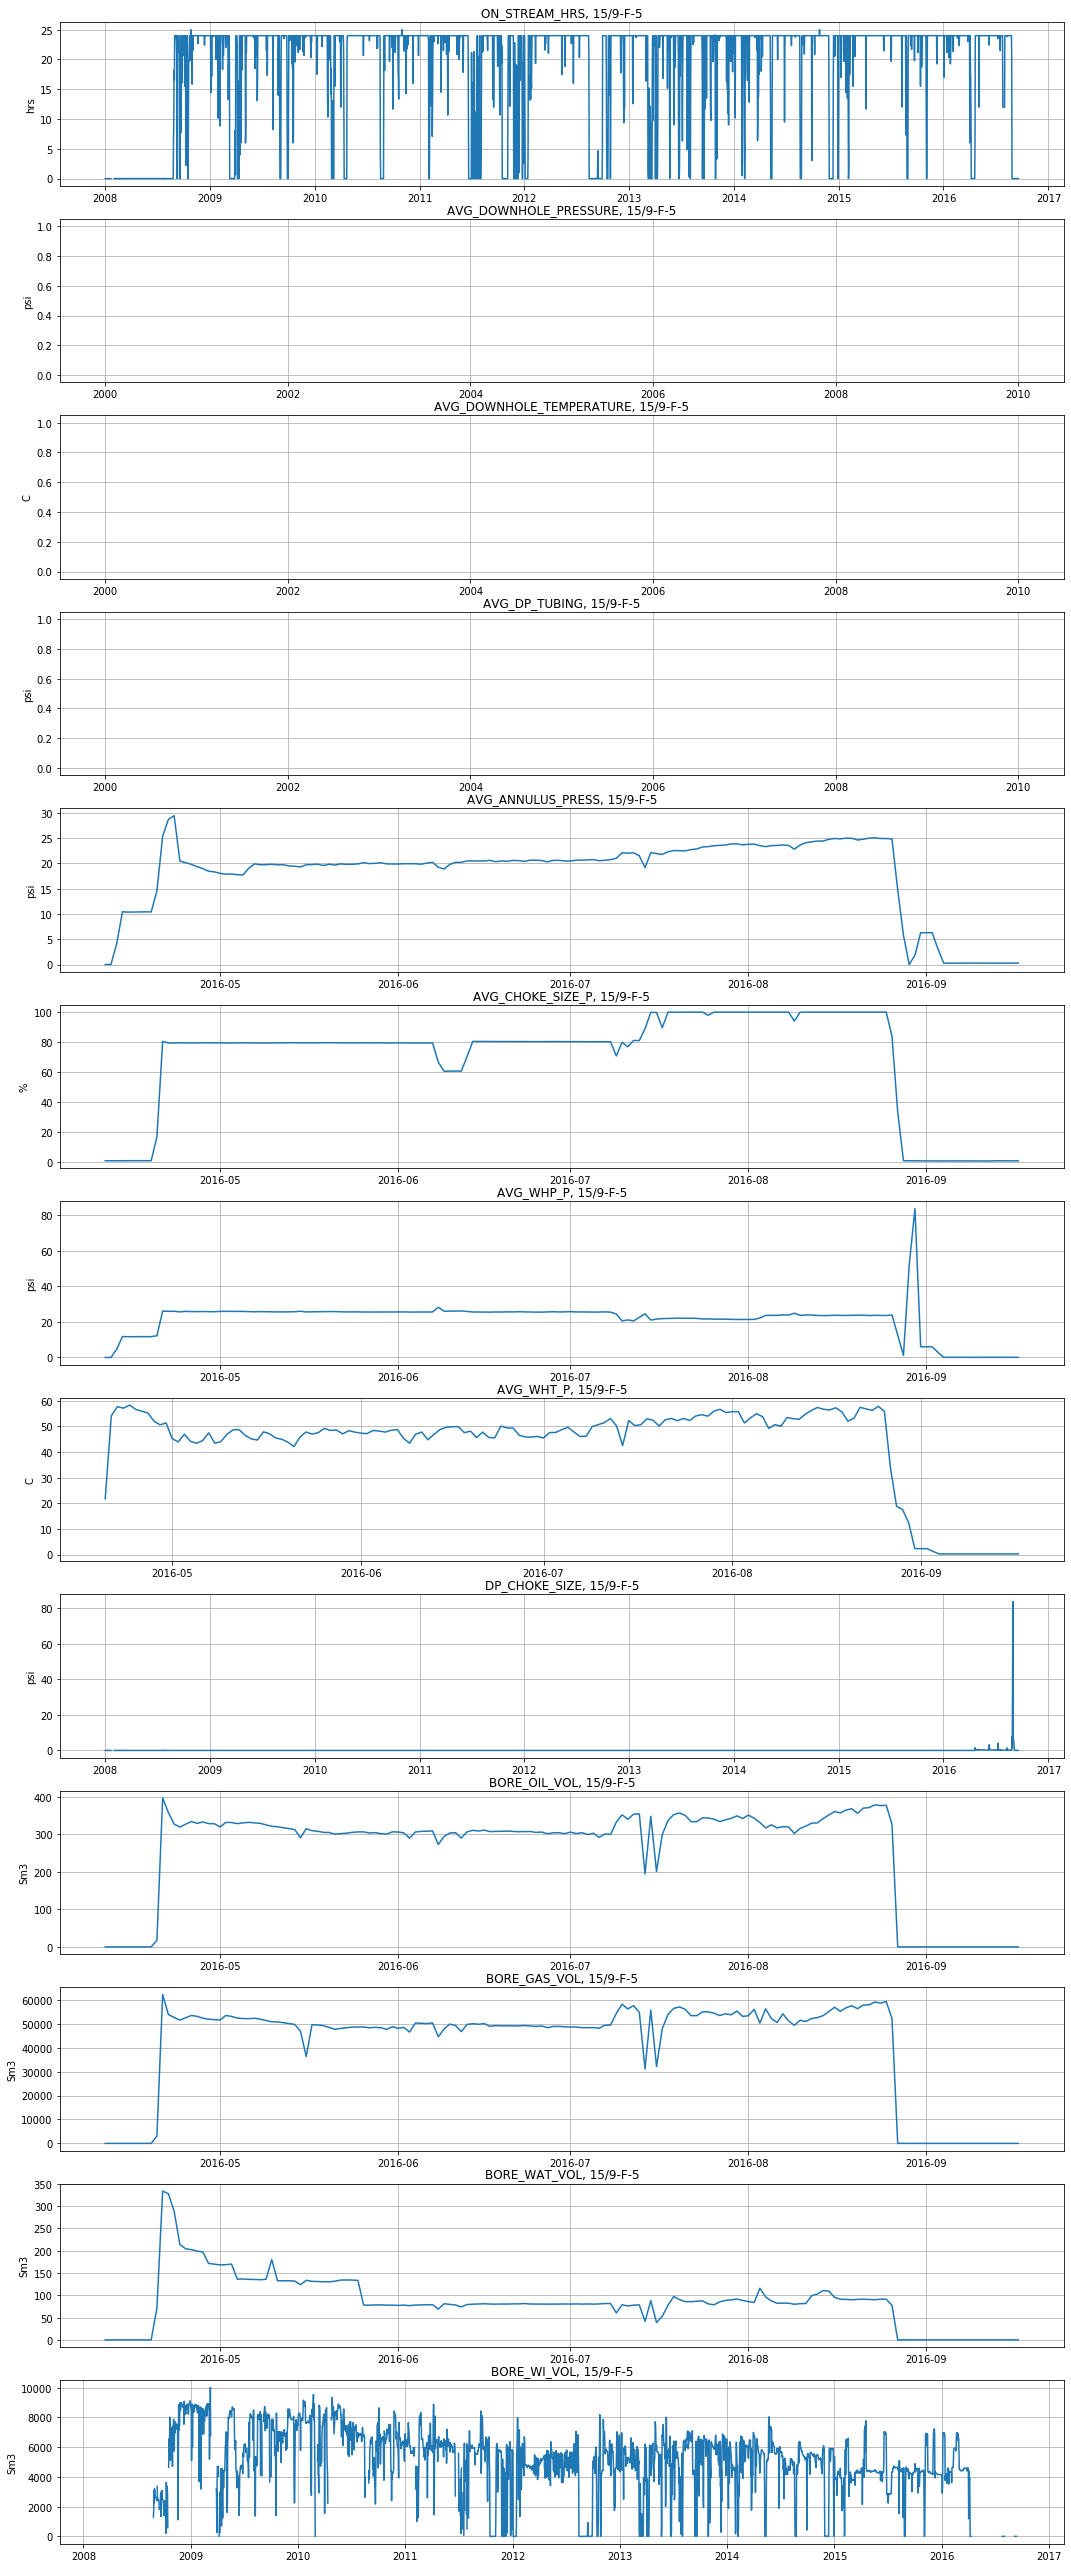

In [28]:
plot_well(5769)

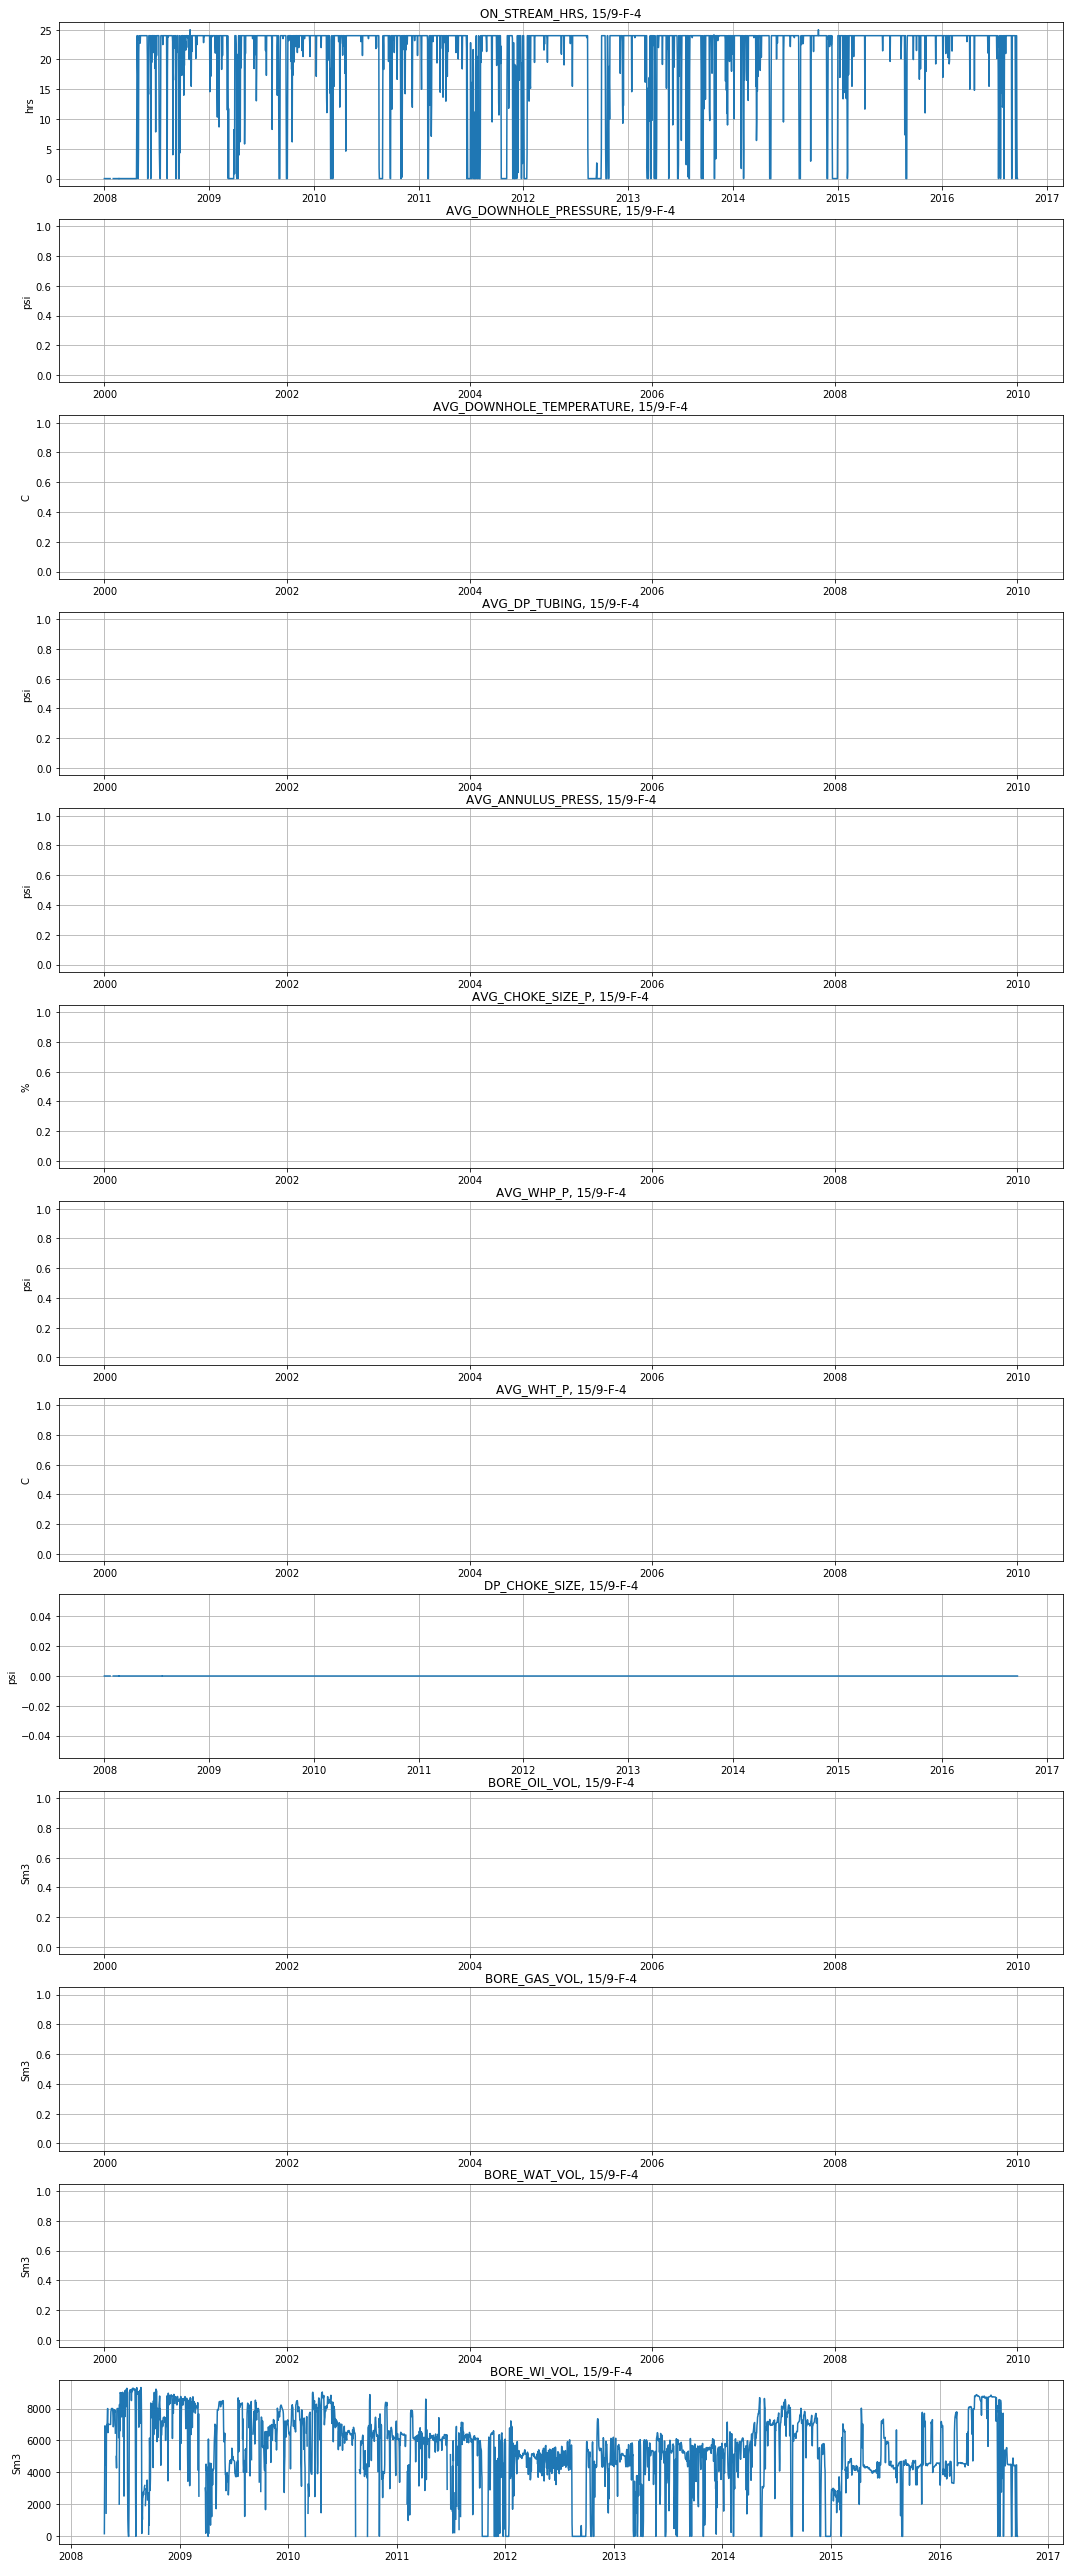

In [29]:
plot_well(5693)

### Production wells

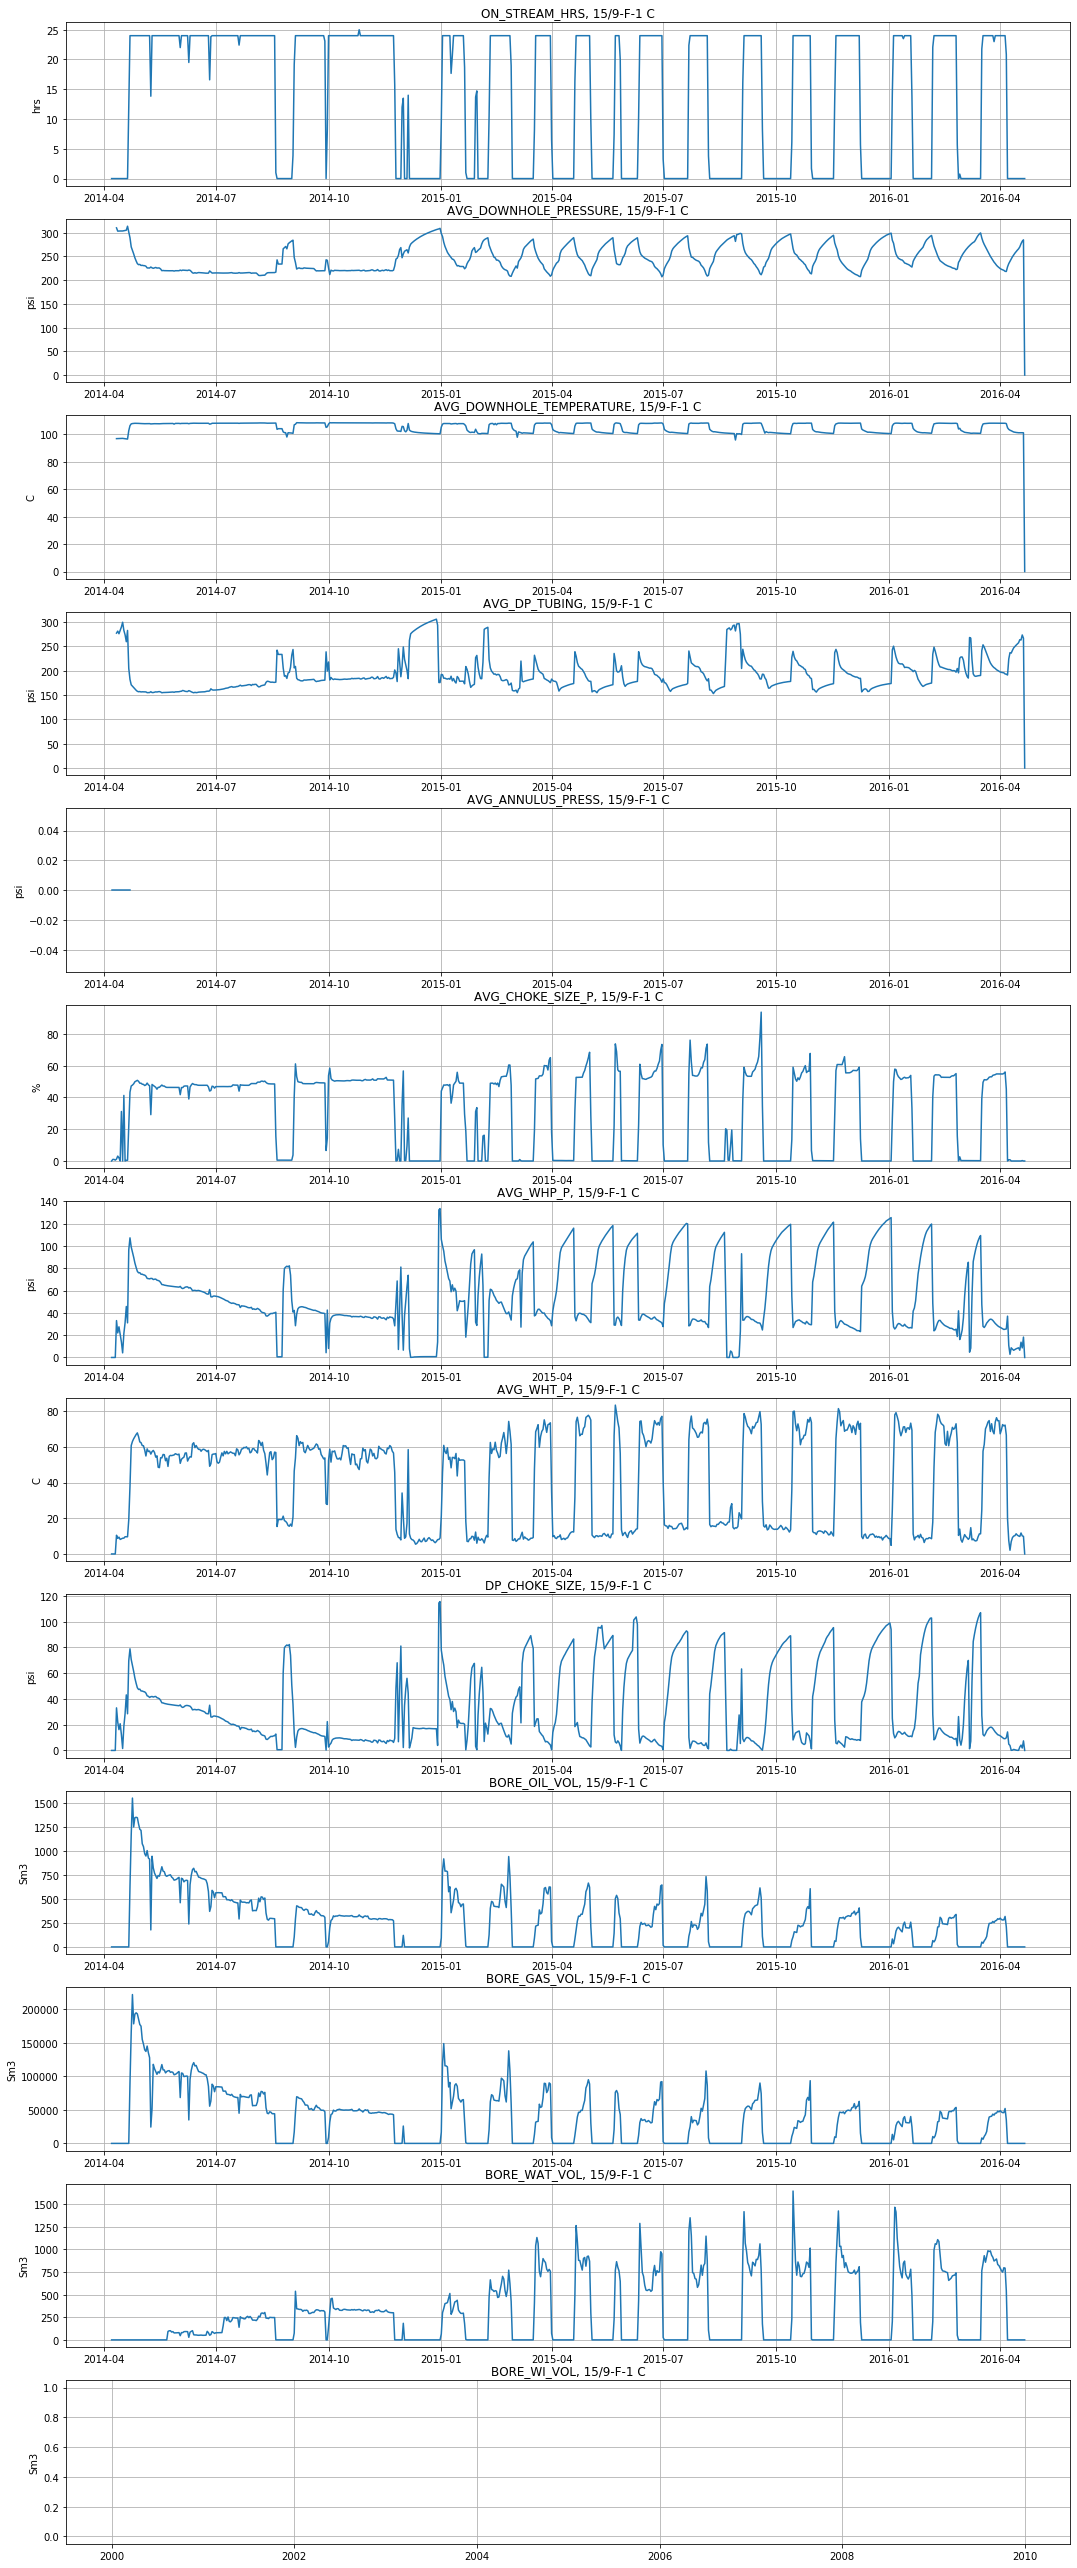

In [30]:
plot_well(7405)

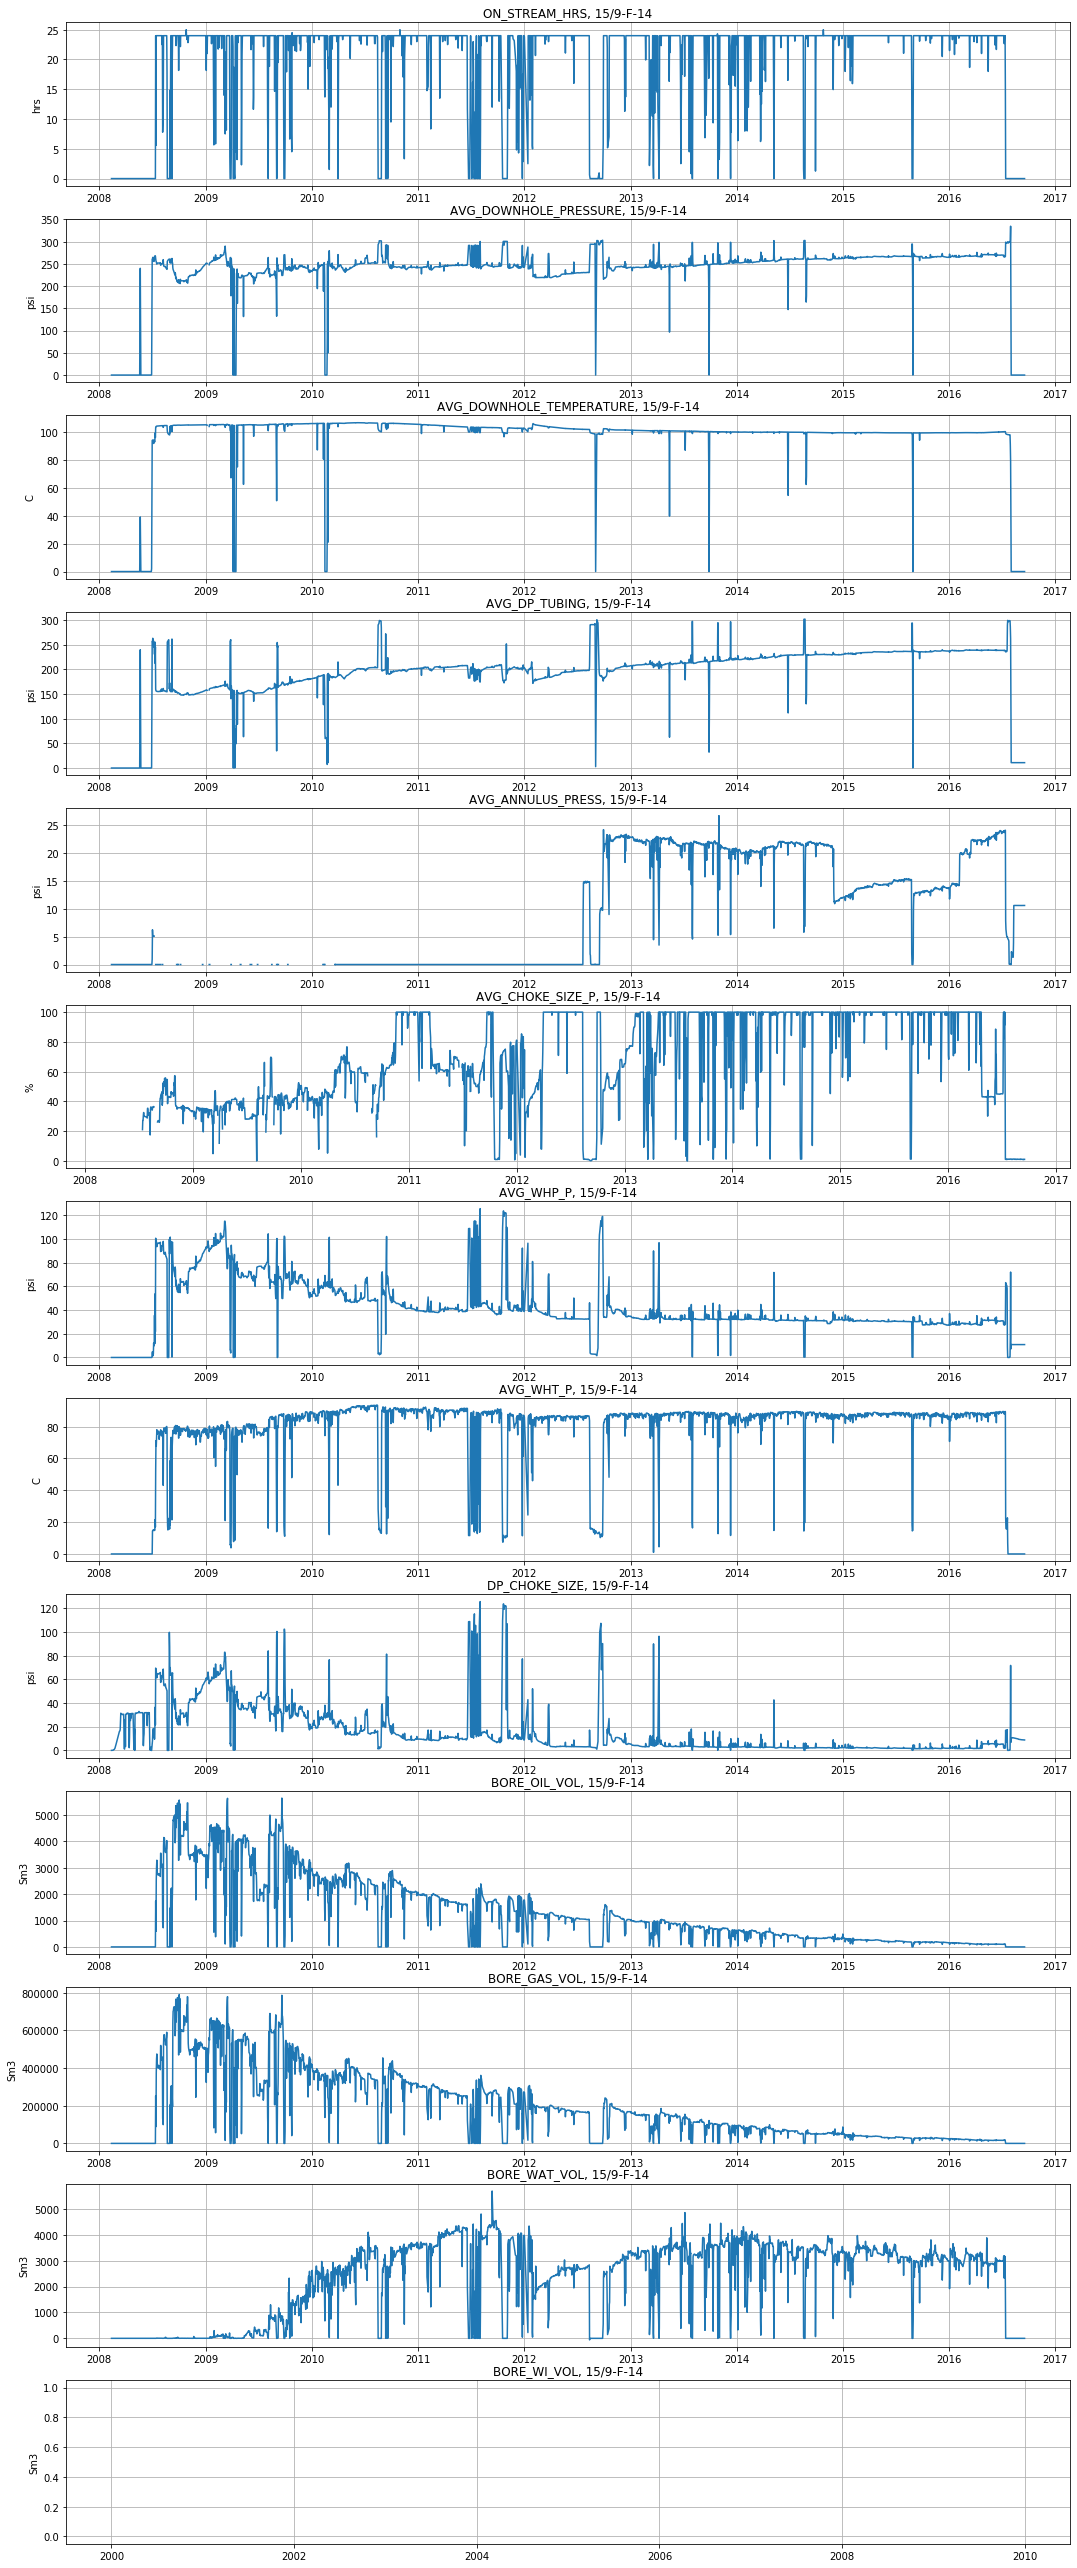

In [31]:
plot_well(5351)

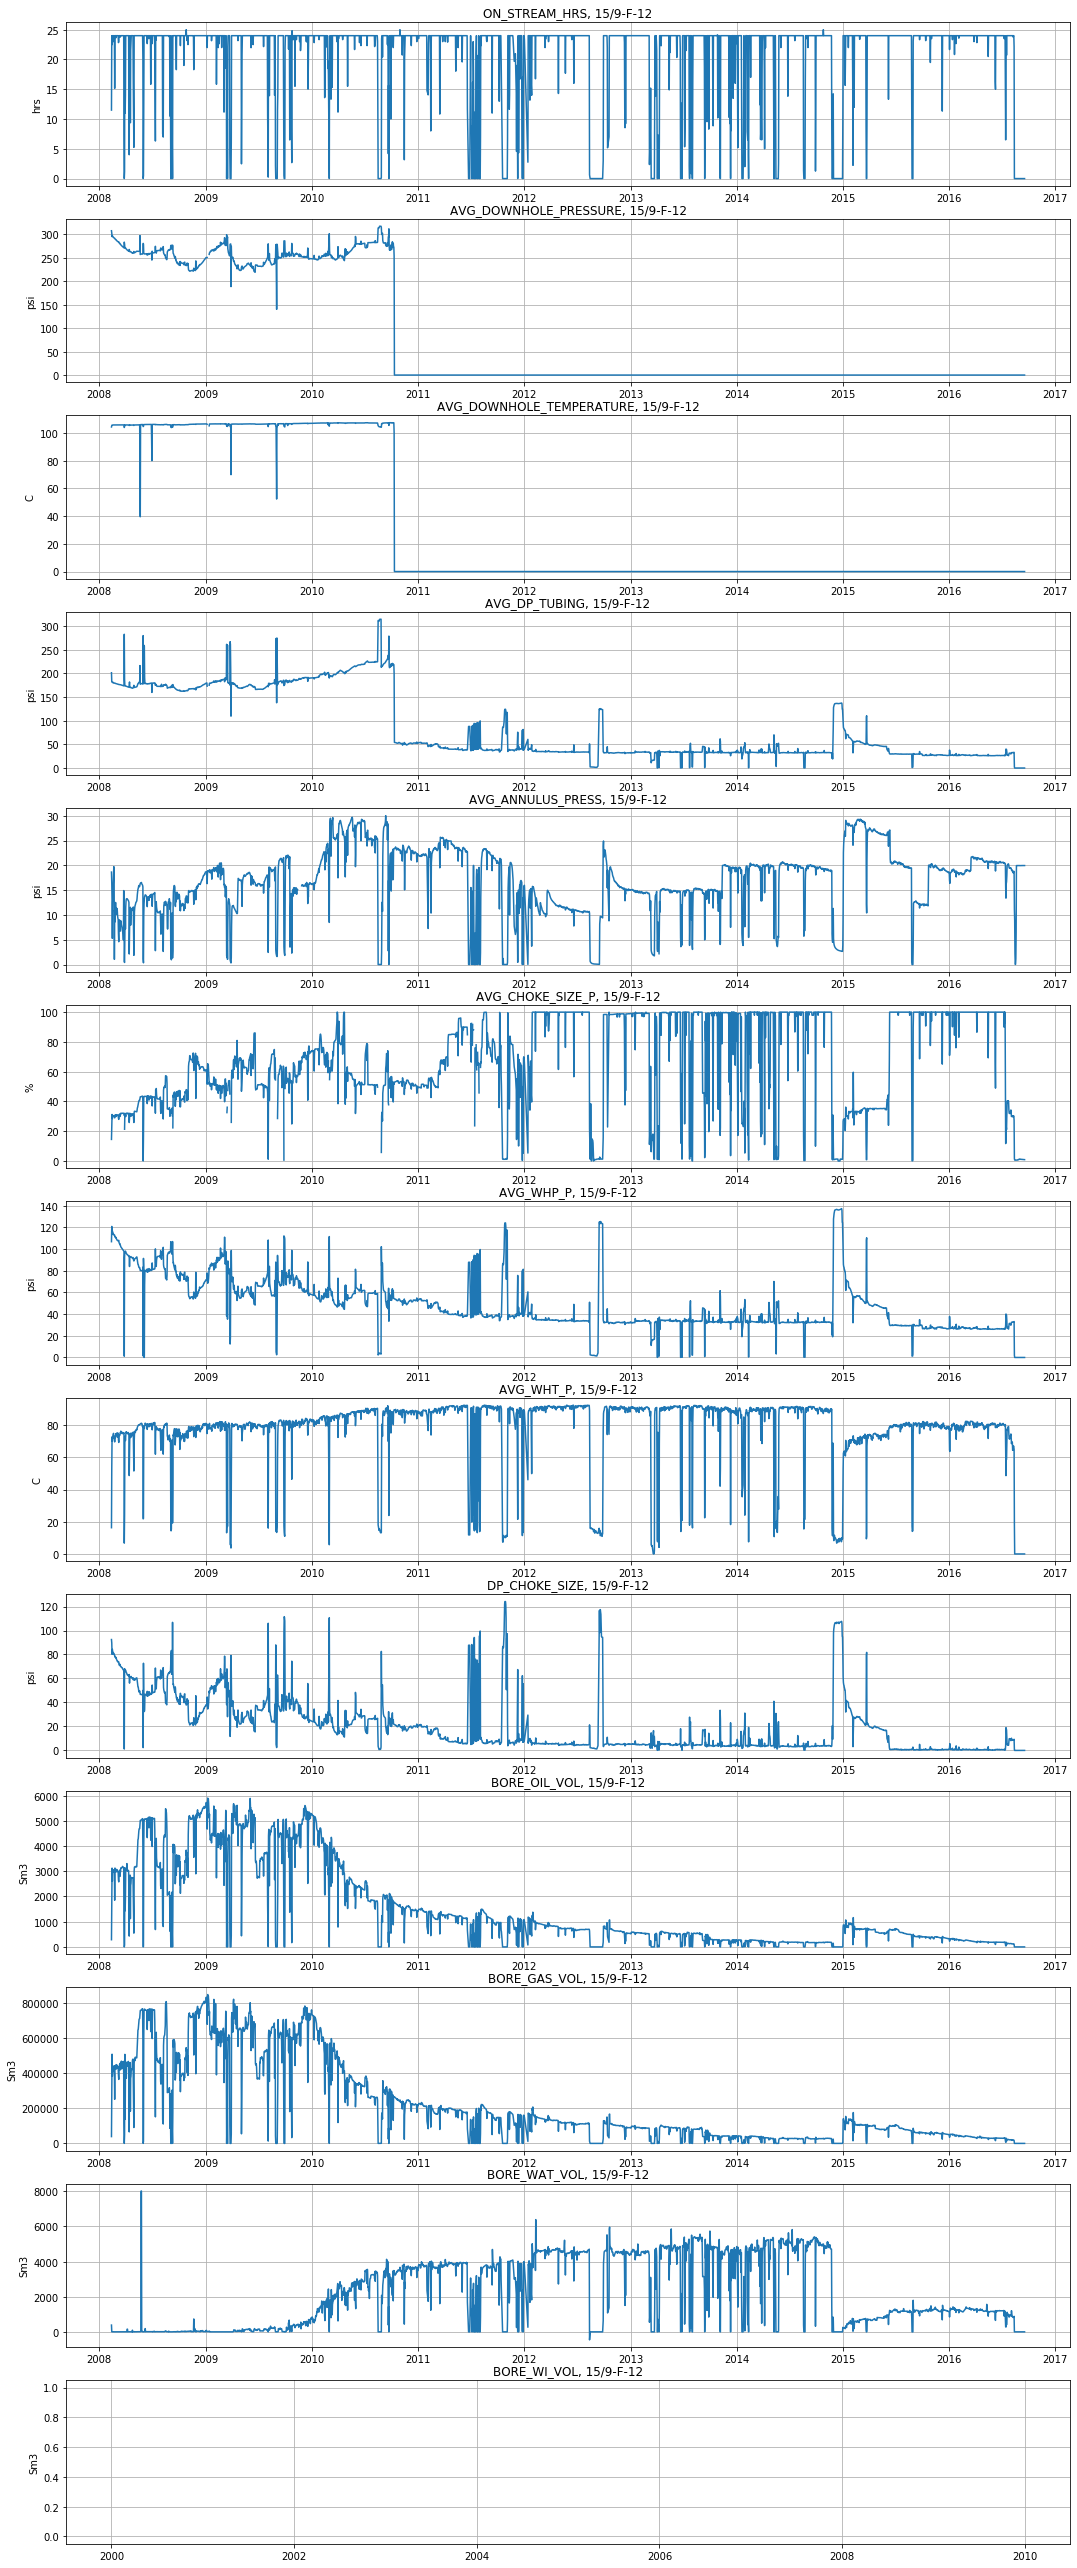

In [32]:
plot_well(5599)

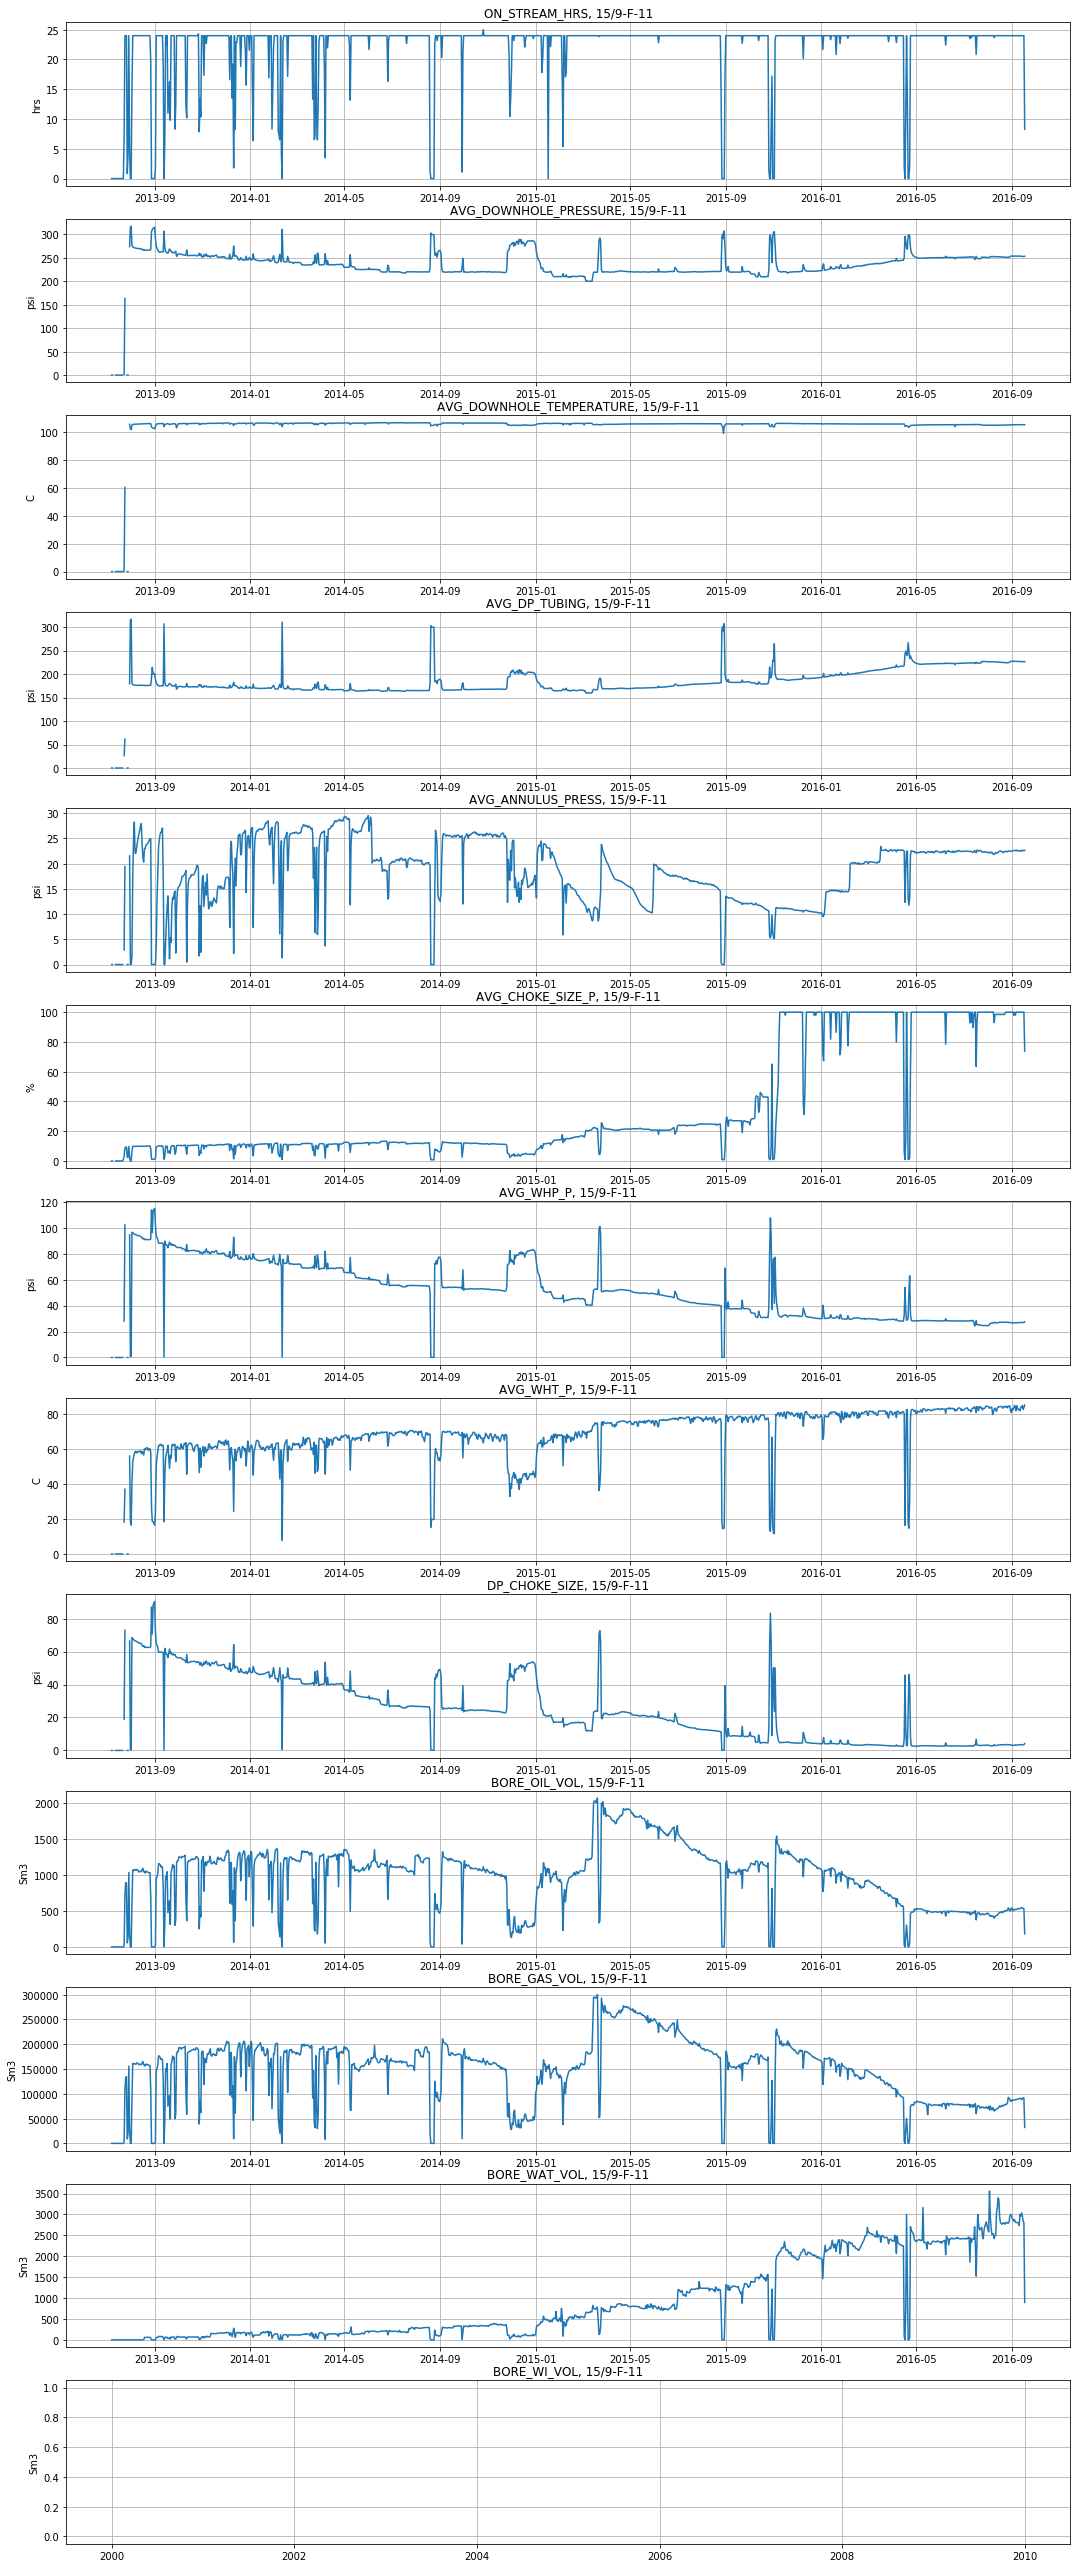

In [33]:
plot_well(7078)

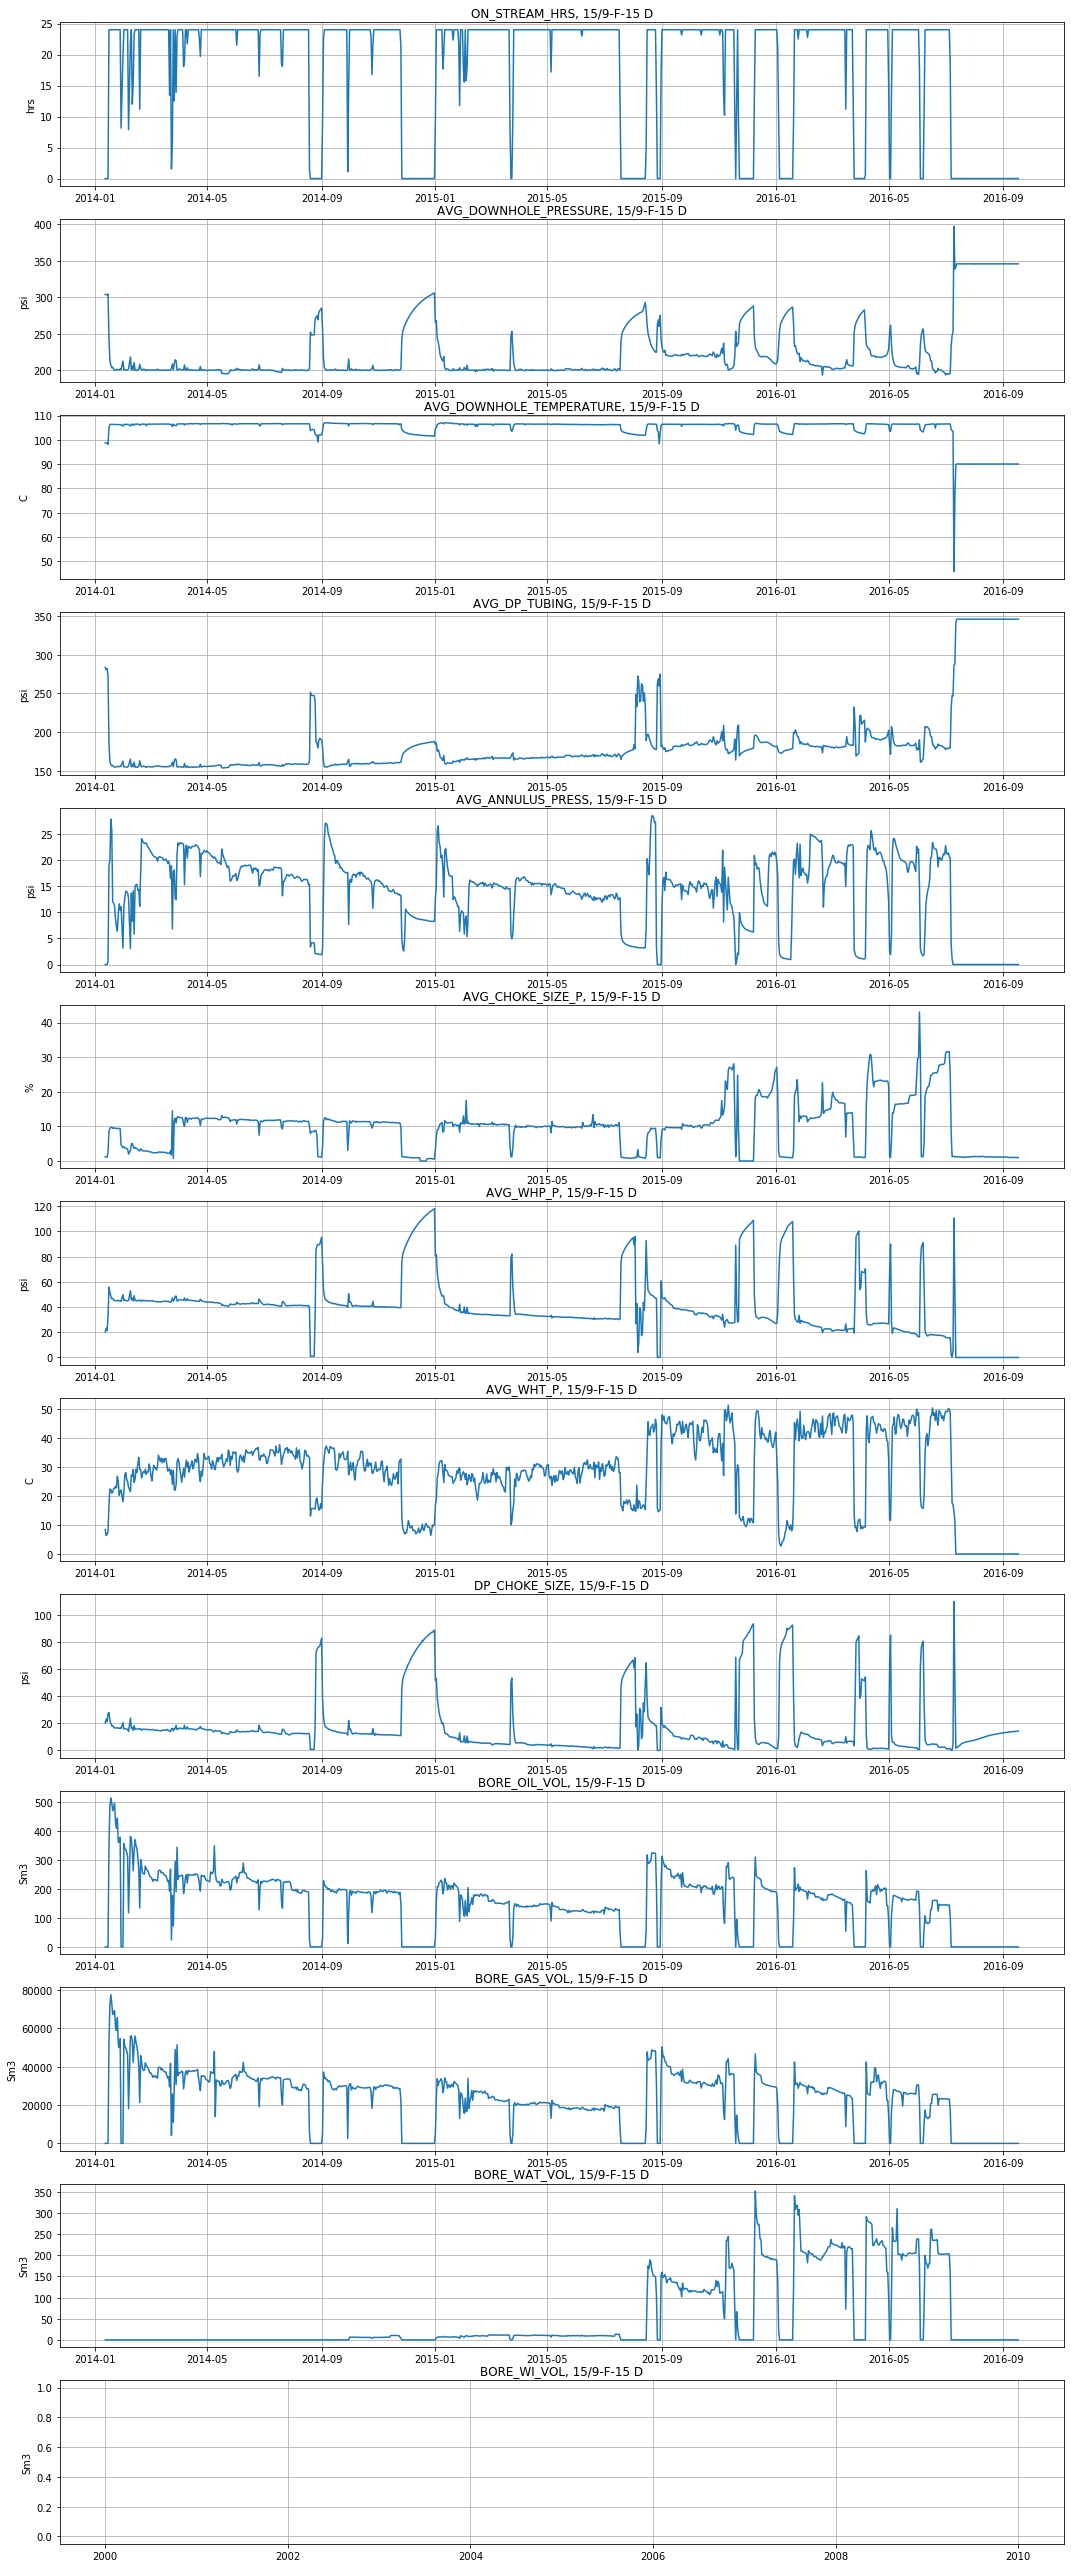

In [34]:
plot_well(7289)

In [35]:
wells[well_num][['AVG_WHP_P', 'AVG_WHT_P', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']].describe()

NameError: name 'well_num' is not defined

In [ ]:
wells[well_num].isna().sum() / wells[well_num].shape[0]

### Monthly data

In [33]:
df2 = pd.read_excel(names[1])
df2

Wellbore name  NPDCode    Year  Month On Stream      Oil          Gas  \
0             NaN      NaN     NaN    NaN       hrs      Sm3          Sm3   
1      15/9-F-1 C   7405.0  2014.0    4.0     227.5  11142.5  1.59794e+06   
2      15/9-F-1 C   7405.0  2014.0    5.0   733.833    24902  3.49623e+06   
3      15/9-F-1 C   7405.0  2014.0    6.0   705.917  19617.8  2.88666e+06   
4      15/9-F-1 C   7405.0  2014.0    7.0   742.417  15085.7  2.24937e+06   
..            ...      ...     ...    ...       ...      ...          ...   
522      15/9-F-5   5769.0  2016.0    5.0       732   9724.4  1.53468e+06   
523      15/9-F-5   5769.0  2016.0    6.0   718.417  9121.48  1.46856e+06   
524      15/9-F-5   5769.0  2016.0    7.0   668.642  9985.29  1.60267e+06   
525      15/9-F-5   5769.0  2016.0    8.0   608.425   8928.9  1.41728e+06   
526      15/9-F-5   5769.0  2016.0    9.0         0        0            0   

       Water   GI   WI  
0        Sm3  Sm3  Sm3  
1          0  NaN  NaN  
2     783.48  NaN  NaN  
3    2068.48  NaN  NaN  
4    6243.98  NaN  NaN  
..       ...  ...  ...  
522   3949.9  NaN    0  
523  2376.93  NaN  NaN  
524  2453.71  NaN    0  
525  2371.86  NaN    0  
526        0  NaN    0  

[527 rows x 10 columns]

In [34]:
units = dict(df2.iloc[0])
units

{'Wellbore name': nan,
 'NPDCode': nan,
 'Year': nan,
 'Month': nan,
 'On Stream': 'hrs',
 'Oil': 'Sm3',
 'Gas': 'Sm3',
 'Water': 'Sm3',
 'GI': 'Sm3',
 'WI': 'Sm3'}

In [35]:
df2 = df2.drop(0)

In [36]:
df2.NPDCode = df2.NPDCode.astype(int)
df2.Year = df2.Year.astype(int)
df2.Month = df2.Month.astype(int)
df2['On Stream'] = df2['On Stream'].astype(float)
df2.Oil = df2.Oil.astype(float)
df2.Gas = df2.Gas.astype(float)
df2.Water = df2.Water.astype(float)
df2.GI = df2.GI.astype(float)
df2.WI = df2.WI.astype(float)

In [37]:
df2

Wellbore name  NPDCode  Year  Month  On Stream       Oil         Gas  \
1      15/9-F-1 C     7405  2014      4  227.50000  11142.47  1597936.65   
2      15/9-F-1 C     7405  2014      5  733.83334  24901.95  3496229.65   
3      15/9-F-1 C     7405  2014      6  705.91666  19617.76  2886661.69   
4      15/9-F-1 C     7405  2014      7  742.41666  15085.68  2249365.75   
5      15/9-F-1 C     7405  2014      8  432.99166   6970.43  1048190.80   
..            ...      ...   ...    ...        ...       ...         ...   
522      15/9-F-5     5769  2016      5  732.00000   9724.40  1534677.16   
523      15/9-F-5     5769  2016      6  718.41667   9121.48  1468557.12   
524      15/9-F-5     5769  2016      7  668.64168   9985.29  1602674.39   
525      15/9-F-5     5769  2016      8  608.42500   8928.90  1417278.51   
526      15/9-F-5     5769  2016      9    0.00000      0.00        0.00   

       Water  GI   WI  
1       0.00 NaN  NaN  
2     783.48 NaN  NaN  
3    2068.48 NaN  NaN  
4    6243.98 NaN  NaN  
5    4529.75 NaN  NaN  
..       ...  ..  ...  
522  3949.90 NaN  0.0  
523  2376.93 NaN  NaN  
524  2453.71 NaN  0.0  
525  2371.86 NaN  0.0  
526     0.00 NaN  0.0  

[526 rows x 10 columns]

In [38]:
df2['Date'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df2.Year, df2.Month)])
df2 = df2.drop(columns=['Year', 'Month'])

In [39]:
df2.dtypes

Wellbore name            object
NPDCode                   int32
On Stream               float64
Oil                     float64
Gas                     float64
Water                   float64
GI                      float64
WI                      float64
Date             datetime64[ns]
dtype: object

In [40]:
df2.GI.sum()

0.0

In [41]:
df2 = df2.drop(columns=['GI'])

In [42]:
int_cols = df2.select_dtypes(include=['int64']).columns
float_cols = df2.select_dtypes(include=['float64']).columns
obj_cols = df2.select_dtypes(include=['object']).columns

not_float_cols = df2.select_dtypes(include=['datetime64[ns]', 'object', 'int64']).columns

In [43]:
df2[float_cols].nunique()

On Stream    424
Oil          299
Gas          299
Water        286
WI           196
dtype: int64

In [44]:
df2.isna().sum() / df2.shape[0]

Wellbore name    0.000000
NPDCode          0.000000
On Stream        0.020913
Oil              0.408745
Gas              0.408745
Water            0.408745
WI               0.617871
Date             0.000000
dtype: float64

In [45]:
df2.groupby(['Wellbore name', 'NPDCode']).size()

Wellbore name  NPDCode
15/9-F-1 C     7405        25
15/9-F-11      7078        39
15/9-F-12      5599       104
15/9-F-14      5351       104
15/9-F-15 D    7289        33
15/9-F-4       5693       112
15/9-F-5       5769       109
dtype: int64

In [46]:
well_nums = [7405, 7078, 5599, 5351, 7289] # df1['Wellbore name'].unique()

wells = dict(zip(well_nums, np.repeat(None, len(well_nums))))
wells

{7405: None, 7078: None, 5599: None, 5351: None, 7289: None}

In [47]:
well_num = 7405 # 5351
wells[well_num] = df2[df2['NPDCode'] == well_num]
# wells[well_num] = wells[well_num].set_index('Date')

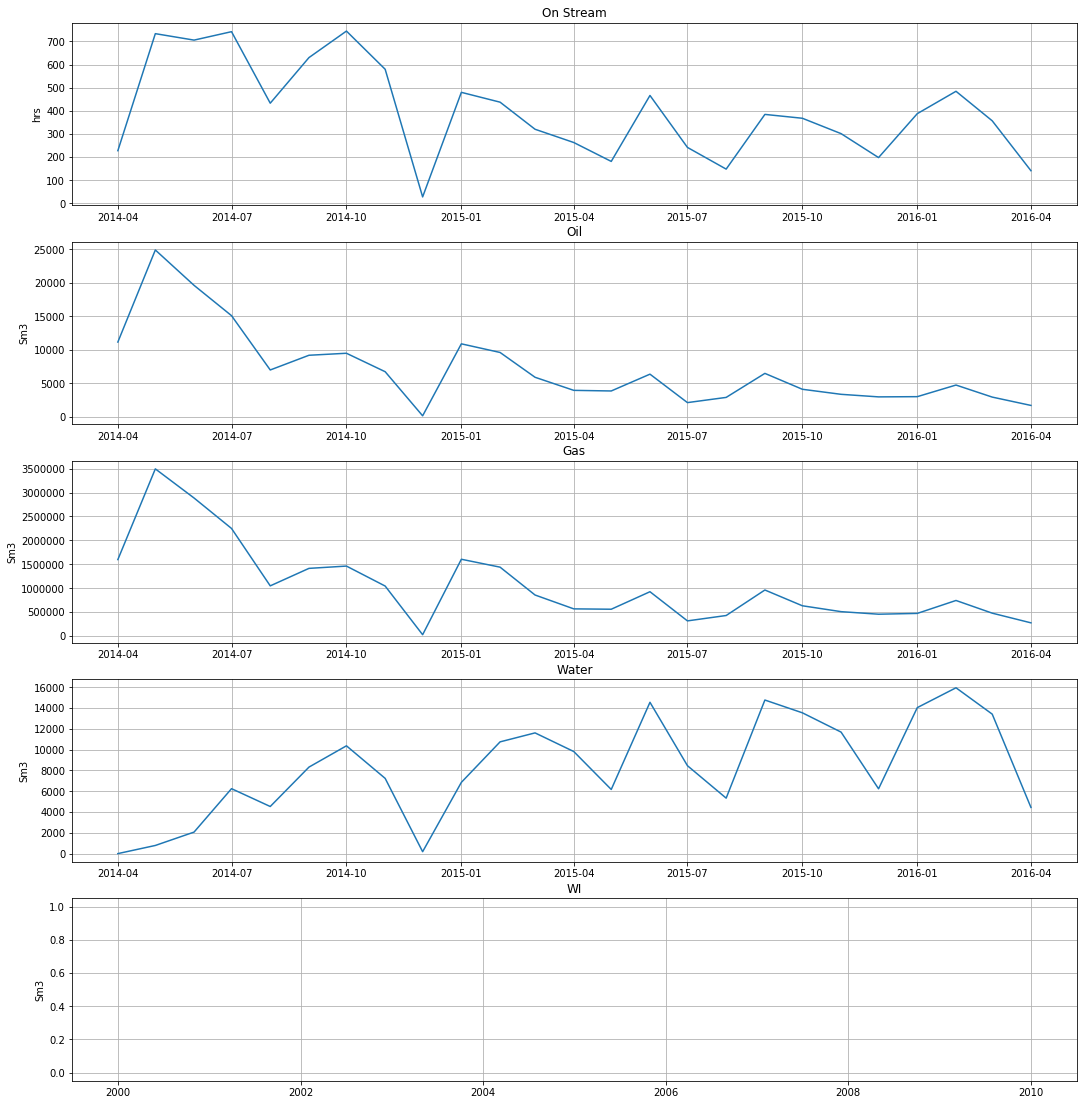

In [48]:
plt.figure(figsize=(18, 100))

for i, col in enumerate(wells[well_num][float_cols]):
    plt.subplot(len(wells[well_num][float_cols]), 1, i+1)
    plt.plot(wells[well_num].Date, wells[well_num][col])
    plt.title(col)
    plt.ylabel(units[col])
    plt.grid(True)

In [2]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
## Opening the F-15 well Trajectory file
WITSML_file = r"C:\Users\Asus\Downloads\Volve\Well_technical_data\EDM.XML\Volve F.edm.xml"
 
# Reading the WITSML file
with open(WITSML_file) as f:
    data = f.read()
    ## Parse the WITSML file using the Beautiful library
    data_xml = BeautifulSoup(data, 'xml')
    # Print the tags in the file
    temp = set([str(tag.name) for tag in data_xml.find_all()])
    print ("\n".join(temp))

CD_NBK_LEAK_OFF_TEST
CD_BHA_COMP_MOTOR
CD_PROJECT_TARGET_WB_LINK
WP_CASE_CSA_PARAMS
CD_PROJ_TARG_WELL_LINK
WP_CUSTOM_BASE_FLUID
CD_DATUM
CD_CLASS
TU_CASE_PARAMETER
CD_FLUID
MD_SITE_TIGHT_GROUP
DM_PARTNER_CONTACT
WP_CASE_CENTRALIZER_SCHD
TU_ZONE_PRESSURE_GROUP
WP_WCN_PARAMS
WP_CASE_SOIL_PROP
WP_KILL_SHEET_GEN
WP_SRG_RECIPROCATION
CD_ATTACHMENT_JOURNAL
export
WP_CASE_SURFACE
execsql
CD_HOLE_SECT_GROUP
WP_CASE_RANGE
WP_TDA_DRAGCHART_COF
WP_CASE_ANNOTATIONS
CD_SURVEY_PROGRAM
WP_SRG_SWAB_SURGE
WP_TDA_FRD_ALL
DP_TEMPLATE
WP_TDA_MANUAL_COF
WP_FLUID_TEMP
WP_TDA_DRAGCHART_SENS
DP_ANTICOL
WP_SRG_PARAMS
CD_WEQP_PACKER
DP_MAGNETIC
CD_DEFINITIVE_SURVEY_STATION
CD_ASSEMBLY_COMP
CD_SURVEY_HEADER
WP_TDA_DRAGCHART_MAN_COF
CD_BHA_COMP_BIT
CD_TEMP_GRADIENT
LINKTABLE
WP_CASE_CIRC_SYSTEM
CD_GEO_ZONE
TU_DLS_OVERRIDE
CD_GEO_SYSTEM
CD_BHA_COMP_STAB
TU_EPP_PARAMETERS
WP_CASE_PUMP
TU_CASE_USER_PARAMETER
TU_LOAD_PARAMETERS
WP_CASE_CENTRALIZER_SCHD_INT
CD_BHA_COMP_DP_HW
WP_SRG_SURGE
WP_CASE_TORT_INT
CD_SITE
WP_TD

In [4]:
columns = ['WP_FLUID_TEMP_FANN_DATA']
df = pd.DataFrame()
for col in columns:
    df[col] = [x.text for x in data_xml.find_all(col)]
print(df)

    WP_FLUID_TEMP_FANN_DATA
0                          
1                          
2                          
3                          
4                          
..                      ...
886                        
887                        
888                        
889                        
890                        

[891 rows x 1 columns]


## Pyfas

OLGA has text input and output files; with pyfas you can expose Olga results to python (both trends and profiles) or dump all the results to excel/csv for your post-precessing.

In [5]:
# !pip install pyfas

In [5]:
import pyfas as fa

tpl_path = 'olga_proj\\'
fname = 'Subsea.tpl'
tpl = fa.Tpl(tpl_path + fname)
tpl.to_excel()

In [7]:
# tpl_path = 'olga_proj\Subsea_Study[1]\\'
# fname = 'C1-100.tpl'
# tpl = fa.Tpl(tpl_path + fname)
# tpl.to_excel()

In [8]:
tab_path = 'olga_proj\\'
fname = '3phase.tab'
tab = fa.Tab(tab_path+fname)
tab.export_all()
tab.data

"Fluid1"
CPG      [1827.15, 1840.09, 1853.09, 1866.13, 1879.18, ...
CPHL     [1760.78, 1775.32, 1789.89, 1804.51, 1819.15, ...
CPWT     [4858.61, 4851.99, 4845.91, 4840.35, 4835.32, ...
DROGDP   [9.6693e-06, 9.55117e-06, 9.43499e-06, 9.32066...
DROGDT   [-0.00371071, -0.00361229, -0.00351742, -0.003...
DROHLDP  [2.70712e-07, 2.76244e-07, 2.82057e-07, 2.8815...
DROHLDT  [-0.22141, -0.221697, -0.222145, -0.222749, -0...
DROWTDP  [5.24478e-07, 5.20429e-07, 5.13001e-07, 5.0386...
DROWTDT  [0.158873, 0.128413, 0.0853738, 0.0359389, -0....
HG       [-19874.9, -12913.9, -5908.44, 1141.91, 8237.4...
HHL      [-318435.0, -311460.0, -304443.0, -297381.0, -...
HWT      [-2732600.0, -2714230.0, -2695880.0, -2677550....
PT       [100000.0, 100000.0, 100000.0, 100000.0, 10000...
ROG      [0.962492, 0.950904, 0.9395, 0.928268, 0.91719...
ROHL     [911.281, 911.298, 911.259, 911.164, 911.015, ...
ROWT     [1020.26, 1017.15, 1014.0, 1010.82, 1007.6, 10...
RS       [0.450472, 0.452195, 0.453876, 0.455531, 0.457...
RSW      [0.00155038, 0.002123, 0.00287825, 0.00386514,...
SEG      [267.123, 295.868, 324.666, 353.596, 382.738, ...
SEHL     [-565.378, -539.062, -512.984, -487.13, -461.4...
SEWT     [-7458.28, -7388.93, -7320.63, -7253.33, -7187...
SIGGHL   [0.0273268, 0.0272482, 0.0271685, 0.0270875, 0...
SIGGWT   [0.077025, 0.0765138, 0.075994, 0.0754656, 0.0...
SIGHLWT  [0.0539004, 0.0535509, 0.0531956, 0.0528346, 0...
TCG      [0.0258483, 0.0262387, 0.0266311, 0.0270249, 0...
TCHL     [0.131966, 0.128805, 0.125876, 0.123163, 0.120...
TCWT     [0.548755, 0.556556, 0.564094, 0.571374, 0.578...
TM       [-9.99999, -6.20688, -2.41378, 1.37932, 5.1724...
VISG     [9.84642e-06, 9.97083e-06, 1.00944e-05, 1.0217...
VISHL    [2.14576, 1.81331, 1.55009, 1.36695, 1.19897, ...
VISWT    [0.00260029, 0.0022322, 0.00193816, 0.00170005...

In [9]:
tab.metadata

{'nfluids': 1,
 'fluids': [' "Fluid1"'],
 'properties': ['PT',
  'TM',
  'ROG',
  'ROHL',
  'ROWT',
  'DROGDP',
  'DROHLDP',
  'DROWTDP',
  'DROGDT',
  'DROHLDT',
  'DROWTDT',
  'RS',
  'RSW',
  'VISG',
  'VISHL',
  'VISWT',
  'CPG',
  'CPHL',
  'CPWT',
  'HG',
  'HHL',
  'HWT',
  'TCG',
  'TCHL',
  'TCWT',
  'SIGGHL',
  'SIGGWT',
  'SIGHLWT',
  'SEG',
  'SEHL',
  'SEWT'],
 't_points': 30,
 'p_points': 30,
 't_array': array([ -9.99999,  -6.20688,  -2.41378,   1.37932,   5.17243,   8.96553,
         12.7586 ,  16.5517 ,  20.3448 ,  24.1379 ,  27.931  ,  31.7242 ,
         35.5173 ,  39.3104 ,  43.1035 ,  46.8966 ,  50.6897 ,  54.4828 ,
         58.2759 ,  62.069  ,  65.8621 ,  69.6552 ,  73.4483 ,  77.2414 ,
         81.0345 ,  84.8276 ,  88.6207 ,  92.4138 ,  96.2069 , 100.     ]),
 'p_array': array([  100000.,   786207.,  1472410.,  2158620.,  2844830.,  3531030.,
         4217240.,  4903450.,  5589660.,  6275860.,  6962070.,  7648280.,
         8334480.,  9020690.,  9706900., 1039310

In [128]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools as it

def plot_property_keyword(pressure, temperature, thermo_property):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    X = []
    Y = []
    for x, y in it.product(pressure, temperature):
        X.append(x/1e5)
        Y.append(y)
    ax.scatter(X, Y, thermo_property)
    ax.set_ylabel('Temperature [C]')
    ax.set_xlabel('Pressure [bar]')
    ax.set_xlim(0, )
    ax.set_title('ROHL')
    return fig

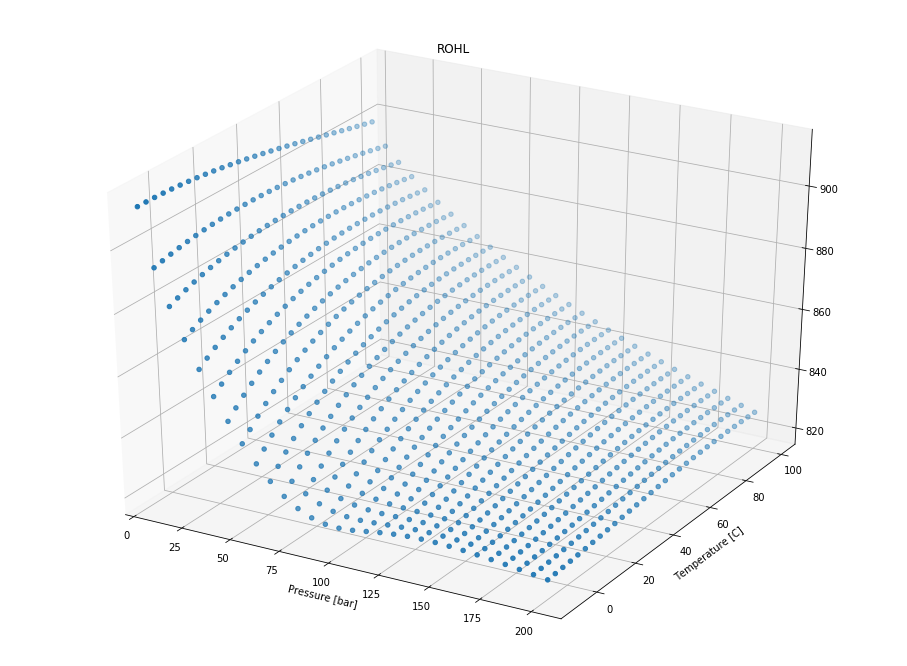

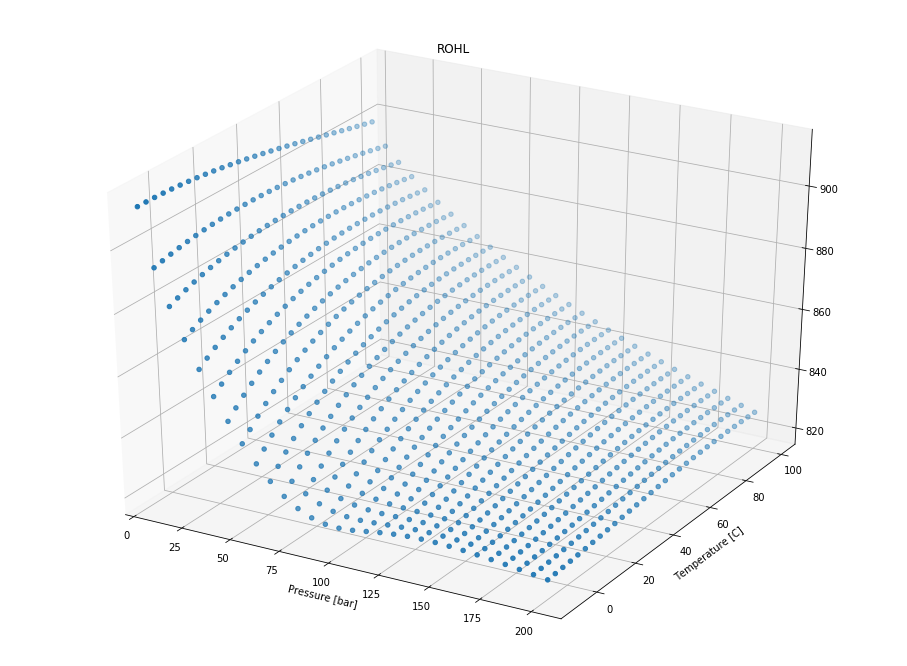

In [11]:
plot_property_keyword(tab.metadata['p_array'],
                      tab.metadata['t_array'],
                      tab.data.T['ROHL'].values[0])

In [134]:
tab_path = 'olga_proj\\'
fname = 'gas-sample.tab'
tab = fa.Tab(tab_path+fname)
tab.export_all()
dff = tab.data
dff

Fluid                   Property  \
39     Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR                GAS DENSITY   
490    Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR             LIQUID DENSITY   
941    Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR              WATER DENSITY   
5000   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR              GAS VISCOSITY   
5451   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR             LIQ. VISCOSITY   
5902   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR             WAT. VISCOSITY   
6353   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR          GAS SPECIFIC HEAT   
6804   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR         LIQ. SPECIFIC HEAT   
7255   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR         WAT. SPECIFIC HEAT   
7706   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR               GAS ENTHALPY   
8157   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR              LIQ. ENTHALPY   
8608   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR              WAT. ENTHALPY   
9059   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR          GAS THERMAL COND.   
9510   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR         LIQ. THERMAL COND.   
9961   Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR         WAT. THERMAL COND.   
10412  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR    SURFACE TENSION GAS/OIL   
10863  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR  SURFACE TENSION GAS/WATER   
11314  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR  SURFACE TENSION WATER/OIL   
11765  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR                GAS ENTROPY   
12216  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR             LIQUID ENTROPY   
12667  Pipeline LUMPED 4 bbl/mm FINAL* EOS= PR              WATER ENTROPY   

         Unit                                        Temperature  \
39      KG/M3  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
490     KG/M3  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
941     KG/M3  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
5000   N S/M2  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
5451   N S/M2  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
5902   N S/M2  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
6353   J/KG K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
6804   J/KG K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
7255   J/KG K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
7706     J/KG  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
8157     J/KG  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
8608     J/KG  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
9059    W/M K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
9510    W/M K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
9961    W/M K  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
10412     N/M  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
10863     N/M  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
11314     N/M  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
11765  J/KG/C  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
12216  J/KG/C  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   
12667  J/KG/C  [-100.0, -100.0, -100.0, -100.0, -100.0, -100....   

                                                Pressure  \
39     [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
490    [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
941    [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
5000   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
5451   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
5902   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
6353   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
6804   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
7255   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
7706   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
8157   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
8608   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
9059   [0.1, 1.0, 5.0, 10.0, 18.0, 26.0, 34.0, 42.0, ...   
9510   [0

In [133]:
min(dff.Pressure.min())

0.1

In [13]:
tab.metadata

{'nfluids': 1,
 'fluids': [' TWO'],
 'properties': ['PT',
  'TM',
  'ROG',
  'ROHL',
  'DROGDP',
  'DROHLDP',
  'DROGDT',
  'DROHLDT',
  'RS',
  'VISG',
  'VISHL',
  'CPG',
  'CPHL',
  'HG',
  'HHL',
  'TCG',
  'TCHL',
  'SIGGHL',
  'SEG',
  'SEHL'],
 't_points': 44,
 'p_points': 45,
 't_array': array([-25. , -20.4, -15.8, -11.2,  -6.6,  -2. ,   2.6,   7.2,  11.8,
         16.4,  21. ,  25.6,  30.2,  34.8,  39.4,  44. ,  48.6,  53.2,
         57.8,  62.4,  67. ,  71.6,  76.2,  80.8,  85.4,  90. ,  94.6,
         99.2, 103.8, 108.4, 113. , 117.6, 122.2, 126.8, 131.4, 136. ,
        140.6, 145.2, 149.8, 154.4, 159. , 163.6, 168.2, 172.8]),
 'p_array': array([1.0000e+04, 3.0700e+06, 6.1300e+06, 9.1900e+06, 1.2250e+07,
        1.5310e+07, 1.8370e+07, 2.1430e+07, 2.4490e+07, 2.7550e+07,
        3.0610e+07, 3.3670e+07, 3.6730e+07, 3.9790e+07, 4.2850e+07,
        4.5910e+07, 4.8970e+07, 5.2030e+07, 5.5090e+07, 5.8150e+07,
        6.1210e+07, 6.4270e+07, 6.7330e+07, 7.0390e+07, 7.3450e+07,
   

ValueError: shape mismatch: objects cannot be broadcast to a single shape

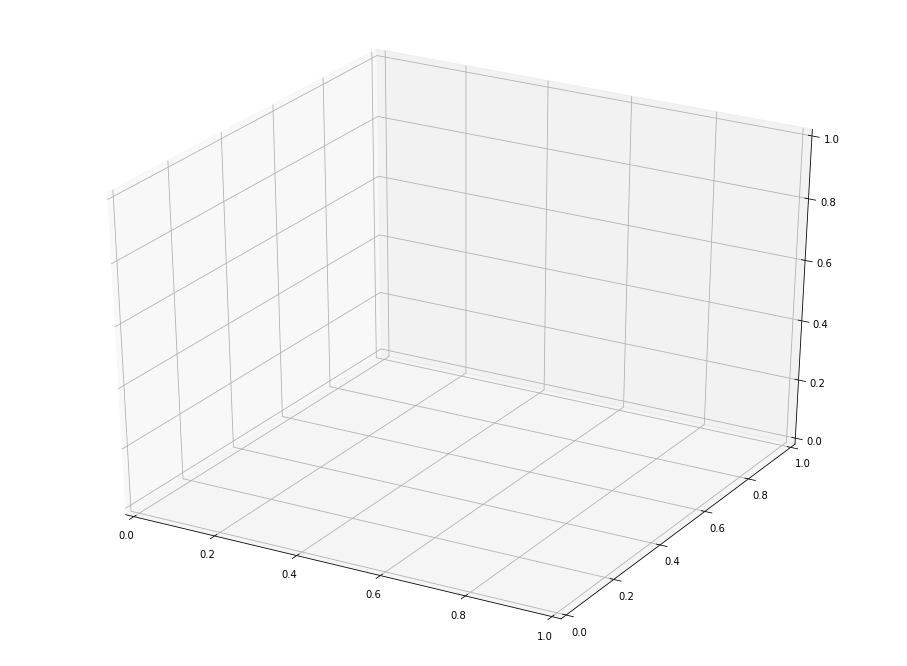

In [14]:
plot_property_keyword(tab.metadata['p_array'],
                      tab.metadata['t_array'],
                      tab.data.T['ROHL'].values[0])

## Regression

Get pressure in any point of the reservoir

In [12]:
from sklearn.linear_model import LinearRegression

In [23]:
fm = pd.read_csv('data/formation.csv')
survey = pd.read_csv('data/survey/survey_F1C_full.csv', delimiter=',')
fm

depth [m MD RKB]  depth [m TVD RKB]  form. press. [bar]  temp. [C]
0             3273.1             2948.1              338.17       85.0
1             3493.0             2980.2              340.45       83.7
2             3523.2             2986.8              340.99       84.5
3             3551.1             2993.1              341.51       85.1
4             3603.0             3007.1              345.38       86.1
5             3620.2             3012.5              344.35       87.1
6             3720.1             3050.4              348.27       87.3
7             3739.9             3057.5              348.79       87.9
8             3768.1             3066.9              349.49       88.6
9             3823.1             3084.9              350.95       89.3
10            3858.0             3096.6              352.21       90.0
11            3925.1             3120.2              353.17       91.4
12            3977.0             3138.8              354.58       92.5

In [58]:
survey

MD [m]  TVD [m]
0       0.00     0.00
1     145.90   145.90
2     150.15   150.15
3     160.45   160.45
4     170.04   170.04
..       ...      ...
108  3987.90  3155.23
109  4028.00  3169.54
110  4069.20  3184.20
111  4079.20  3187.77
112  4094.00  3193.05

[113 rows x 2 columns]

In [51]:
pt = LinearRegression()
pt.fit(np.array(fm['depth [m MD RKB]']).reshape(-1, 1), fm[['form. press. [bar]', 'temp. [C]']])

dep = LinearRegression()
dep.fit(np.array(survey['TVD [m]']).reshape(-1, 1), survey[['MD [m]']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
def pred(model, num):
    return model.predict(np.array([num]).reshape(-1, 1))

In [61]:
pred(pt, 3485), pred(pt, 3762)

(array([[341.51984357,  85.06923943]]), array([[348.9088133 ,  88.58306052]]))

In [64]:
pred(pt, pred(dep, 2800)[0][0]), pred(pt, pred(dep, 3190.55)[0][0])

(array([[332.31113497,  80.69004237]]), array([[344.51652032,  86.49430765]]))

In [66]:
pred(pt, 4087)

array([[357.57818212,  92.7057748 ]])